# "Global sales" model (optimized)

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from tensorflow import keras

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

/Users/tyler/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
model_df = pd.read_csv("data/game_sales_ml_model.csv")

model_df.head()

,Publisher,Year of Release,Critic Score,User Score,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales,Platform_3DS,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T,Rating_Unknown
0,167,2006,76.0,8.0,41.36,28.96,3.77,8.45,82.53,False,...,True,False,False,True,False,False,False,False,False,False
1,167,2008,82.0,8.3,15.68,12.76,3.79,3.29,35.52,False,...,False,False,False,True,False,False,False,False,False,False
2,167,2009,80.0,8.0,15.61,10.93,3.28,2.95,32.77,False,...,True,False,False,True,False,False,False,False,False,False
3,167,2006,89.0,8.5,11.28,9.14,6.50,2.88,29.80,False,...,False,False,False,True,False,False,False,False,False,False
4,167,2006,58.0,6.6,13.96,9.18,2.93,2.84,28.92,False,...,False,False,False,True,False,False,False,False,False,False


## Modeling: Neural Network (optimized)

### Selecting the target (y) and features (X)

In [3]:
y = model_df["Global Sales"] # target
X = model_df.drop(columns=["Global Sales"]) # features

### Splitting the data: 80% training and 20% testing

In [4]:
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=.20, random_state=42)

In [5]:
scaler = StandardScaler() # mean=0, standard_deviation=1

X_training = scaler.fit_transform(X_training)
X_testing = scaler.fit_transform(X_testing)

### Building the regression model (optimized)

In [6]:
model_neuralnetwork_optimized = keras.Sequential(
    [
        # layer 1
        keras.layers.Dense(128, activation="relu", input_shape=(X_training.shape[1],)),
        # layer 2
        keras.layers.Dense(64, activation="relu"),
        # layer 3
        keras.layers.Dense(32, activation="relu"),
        # layer 4
        keras.layers.Dense(16, activation="relu"),
        # output layer
        keras.layers.Dense(1)
    ]
)

model_neuralnetwork_optimized.compile(optimizer="adam", loss="mean_squared_error", metrics=[keras.metrics.RootMeanSquaredError()])

/Users/tyler/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training and evaluating the regression model

In [7]:
model_neuralnetwork_optimized.fit(X_training, y_training, epochs=50, batch_size=32, validation_data=(X_testing, y_testing))

Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7826 - root_mean_squared_error: 1.2813 - val_loss: 0.5105 - val_root_mean_squared_error: 0.7145
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0917 - root_mean_squared_error: 0.2997 - val_loss: 0.0821 - val_root_mean_squared_error: 0.2866
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0267 - root_mean_squared_error: 0.1630 - val_loss: 0.1192 - val_root_mean_squared_error: 0.3453
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.0191 - root_mean_squared_error: 0.1379 - val_loss: 0.0900 - val_root_mean_squared_error: 0.3000
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0084 - root_mean_squared_error: 0.0917 - val_loss: 0.0856 - val_root_mean_squared_error: 0.2926
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0079 - root_mean_squared_error: 0.0888 - val_loss: 0.0976 - val_root_mean_squared_error: 0.3124
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s

In [8]:
model_neuralnetwork_optimized.evaluate(X_testing, y_testing)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.0631 - root_mean_squared_error: 0.2490


[0.07443747669458389, 0.27283233404159546]

### Predicting

In [9]:
y_neuralnetwork_prediction = model_neuralnetwork_optimized.predict(X_testing)

r2_neuralnetwork_optimized = r2_score(y_testing, y_neuralnetwork_prediction)
print(f"r2_neuralnetwork_optimized: {r2_neuralnetwork_optimized}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
r2_neuralnetwork_optimized: 0.972606669639267


## Saving

### Models

In [10]:
with open("models/global_sales_model_neuralnetwork_optimized.pkl", "wb") as file:
    pickle.dump(model_neuralnetwork_optimized, file)

### Images

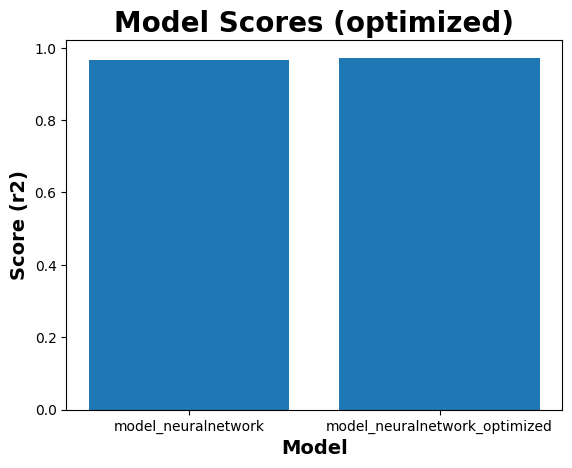

In [11]:
# data
models = ["model_neuralnetwork", "model_neuralnetwork_optimized"]
scores = [0.9646964596785949, r2_neuralnetwork_optimized]

# plotting
plt.bar(models, scores)

# formatting
plt.title("Model Scores (optimized)", fontsize=20, fontweight="bold")
plt.xlabel("Model", fontsize=14, fontweight="bold")
plt.ylabel("Score (r2)", fontsize=14, fontweight="bold")

# saving / showing
plt.savefig("visuals/Model-Scores-Optimized.jpg")
plt.show()